<a href="https://colab.research.google.com/github/younghoonNa/pythonDT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_5%EC%9D%BC%EC%B0%A8_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
# 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 변환기 생성
scaler.fit(boston['data']) # 각 컬럼의 평균과 표준편차를 알아내는 작업
x_scaled = scaler.transform(boston['data']) # 표준화 적용
pd.DataFrame(x_scaled).describe().round(2)

In [ ]:
# 최소 최대 정규화 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(boston['data'])
pd.DataFrame(x_scaled).describe().round(2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, boston['target'], random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7697699488741149, 0.6354638433202123)

In [ ]:
# 다항변환 적용
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2, include_bias=False)
x_poly = P.fit_transform(boston['data']) # 다항변환 및 상호교차항 적용
boston['data'].shape, x_poly.shape

((506, 13), (506, 104))

In [ ]:
P.get_feature_names_out() # 변환된 컬럼명 정보 조회

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, boston['target'], random_state=0)
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9520519609032728, 0.607472195965229)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2500).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.91725906854018, 0.7394691032074603)

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+03, tolerance: 3.233e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(0.9068684337013593, 0.7280316827205046)

In [ ]:
len(model.coef_), len(model.coef_[model.coef_ != 0 ])

(104, 55)

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,11,13])
y = np.array([0,0,0,0,0,0,0,1,1,1,1])
plt.scatter(x, y)
plt.show()

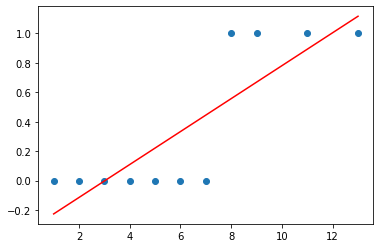

In [ ]:
model = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()

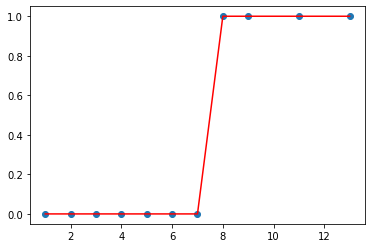

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # 특성의 값을 이용해서 악성 종양 or 양성 종양 분류
cancer['target'] # 0 or 1 > 범주형 > 분류 모델 

In [ ]:
cancer['target_names']
# 0 : 'malignant' > 악성
# 1 : 'benign'    > 양성

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =\
    train_test_split(cancer['data'], cancer['target'], random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)
# ConvergenceWarning : 수렴 경고 > 학습 횟수를 증가

(0.960093896713615, 0.951048951048951)

In [ ]:
model.predict(x_test) # 예측 레이블
model.predict_proba(x_test) # 예측 확률 (분류모델)
model.decision_function(x_test) # 회귀식의 계산 결과 
# 회귀식의 계산 결과  > sigmoid > 확률 > cutoff > 레이블

In [ ]:
import numpy as np 
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))
x_range = np.arange(-10, 10.1, 0.1)
y_range = [sigmoid(x) for x in x_range]
plt.plot(x_range, y_range)

In [ ]:
model.decision_function(x_test)[0] # -5.3699247474945935
sigmoid(-5.3699247474945935)       # 0.0046329177283744435 > Y가 1일 확률
model.predict_proba(x_test)[0]
model.predict(x_test)[0]

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits() # 손글씨 데이터 세트 (0 ~ 9) > 총 범주 10개
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'], digits['target'], random_state=0)
model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.coef_.shape # (10, 64) > (모델의개수, 특성의 개수)

(10, 64)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test =\
    train_test_split(cancer['data'], cancer['target'], random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)
# DecisionTree : 학습을 할때마다 특성의 순서를 셔플 후 사용 

(1.0, 0.8811188811188811)

In [ ]:
# 특성 중요도 
model.feature_importances_

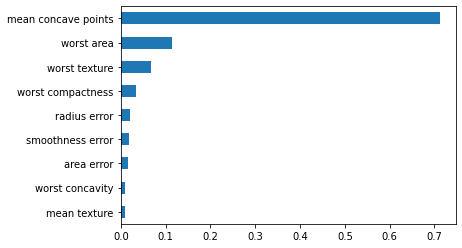

In [ ]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values().plot(kind='barh')

In [ ]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model, # 시각화할 모델
                out_file='model.dot', # 저장할 파일명
                feature_names=cancer['feature_names'], # 컬럼명
                class_names=cancer['target_names'], # 레이블명
                impurity=True, # 불순도 출력 유무
                filled=True) # 노드에 과반 범주 색상 부여 유무

In [ ]:
import graphviz
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data).render('model') # pdf 저장
graphviz.Source(data) # 출력창에 출력

'model.pdf'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.972027972027972)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.972027972027972)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
print('LinearRegression', model.score(x_train, y_train), model.score(x_test, y_test))

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)
print('RandomForestRegressor', model.score(x_train, y_train), model.score(x_test, y_test))

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)
print('GradientBoostingRegressor', model.score(x_train, y_train), model.score(x_test, y_test))

LinearRegression 0.7697699488741149 0.635463843320211
RandomForestRegressor 0.9803919053376355 0.78628866061438
GradientBoostingRegressor 0.9829864654169255 0.822792777833321
